## Titanic Dataset Preprocessing

In [432]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [433]:
raw_data_path=os.path.join(os.path.pardir,'data','raw')
train_data_path=os.path.join(raw_data_path,'train.csv')
test_data_path=os.path.join(raw_data_path,'test.csv')

In [434]:
train_df=pd.read_csv(train_data_path,index_col='PassengerId')
test_df=pd.read_csv(test_data_path,index_col='PassengerId')

In [435]:
train_df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##  Basic Structure

In [436]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [437]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [438]:
test_df['Survived']=-888

In [569]:
df=pd.concat((train_df,test_df),axis=0)

In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [441]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450


In [442]:
df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,-888,A.5. 3236
1306,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1,female,0,-888,PC 17758
1307,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,3,male,0,-888,SOTON/O.Q. 3101262
1308,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,3,male,0,-888,359309
1309,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,3,male,1,-888,2668


In [443]:
df.loc[1:10,'Age':'Pclass']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass
PassengerId,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3


In [444]:
df.loc[1:10,['Survived','Embarked','Fare']]

,Survived,Embarked,Fare
PassengerId,,,
1,0,S,7.2500
2,1,C,71.2833
3,1,S,7.9250
4,1,S,53.1000
5,0,S,8.0500
6,0,Q,8.4583
7,0,S,51.8625
8,0,S,21.0750
9,1,S,11.1333


In [445]:
male_passengers=df.loc[df['Sex']=='male',:]
print('There are {0} Male passengers'.format(len(male_passengers)))

There are 843 Male passengers


In [446]:
first_class_male_passengers=df.loc[(df['Sex']=='male') & (df['Pclass']==1)]
print('There are {0} First class Male passengers'.format(len(first_class_male_passengers)))

There are 179 First class Male passengers


## Summary statistics

In [447]:
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-283.301757
std,14.413493,51.758668,0.865560,0.837836,1.041658,414.337413
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-888.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


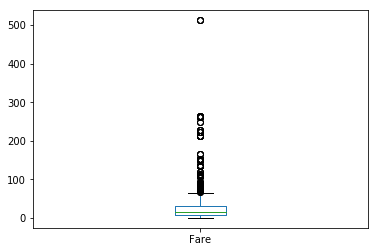

In [448]:
df['Fare'].plot(kind='box')

In [449]:
df.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Kelly, Mr. James",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,-283.301757,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,414.337413,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-888.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-888.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


#### This summary statistics implies that there are 3 unique Embarkment points and mostly embarkment is done from 'S' and there 2 unique Sex counts ie 'Male' and 'Female'

In [450]:
df['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [451]:


df['Sex'].value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [452]:
df['Survived'][df['Survived']!=-888].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### This implies 342 passengers survived and 549 passengers lost their lives

In [453]:
df['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [454]:
df['Pclass'].value_counts(normalize=True)

3    0.541635
1    0.246753
2    0.211612
Name: Pclass, dtype: float64

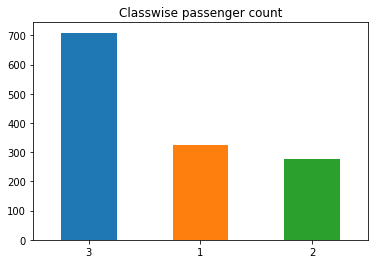

In [455]:
df['Pclass'].value_counts().plot(kind='bar',rot=0,title='Classwise passenger count')

## Distributions - Univariate Distributions

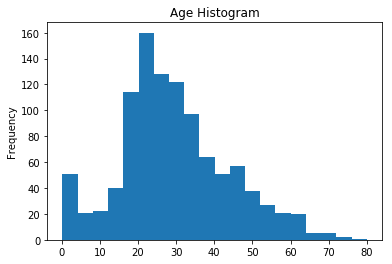

In [456]:
df['Age'].plot(kind='hist',title='Age Histogram',bins=20)

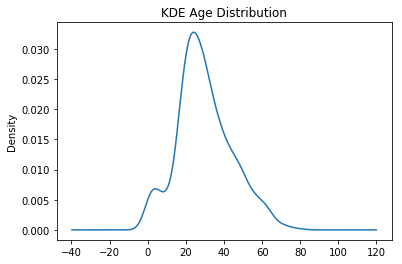

In [457]:

df['Age'].plot(kind='kde',title='KDE Age Distribution')

#### This implies that the 'Age' has some positive skewness

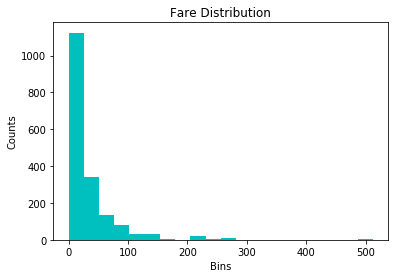

In [573]:
f,ax=plt.subplots()
ax.hist(df['Fare'],bins=20,color='c')
ax.set_title('Fare Distribution')
ax.set_xlabel('Bins')
ax.set_ylabel('Counts')
plt.show()

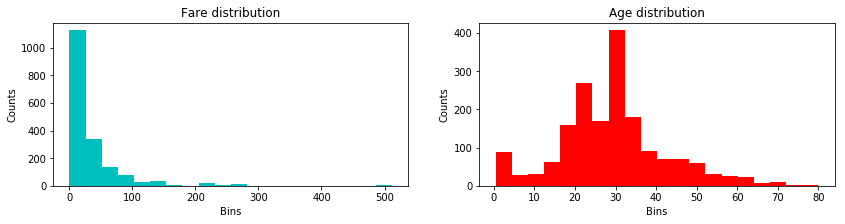

In [576]:
f,(ax1,ax2)=plt.subplots(1,2,figsize=(14,3))
ax1.hist(df['Fare'],bins=20,color='c')
ax1.set_title('Fare distribution')
ax1.set_xlabel('Bins')
ax1.set_ylabel('Counts')

ax2.hist(df['Age'],bins=20,color='r')
ax2.set_title('Age distribution')
ax2.set_xlabel('Bins')
ax2.set_ylabel('Counts')
plt.show()

In [459]:
print('The skewness of Age attribute is {0:.2f}'.format(df['Age'].skew()))
print('The skewness of Fare attribute is {0:.2f}'.format(df['Fare'].skew()))

The skewness of Age attribute is 0.41
The skewness of Fare attribute is 4.37


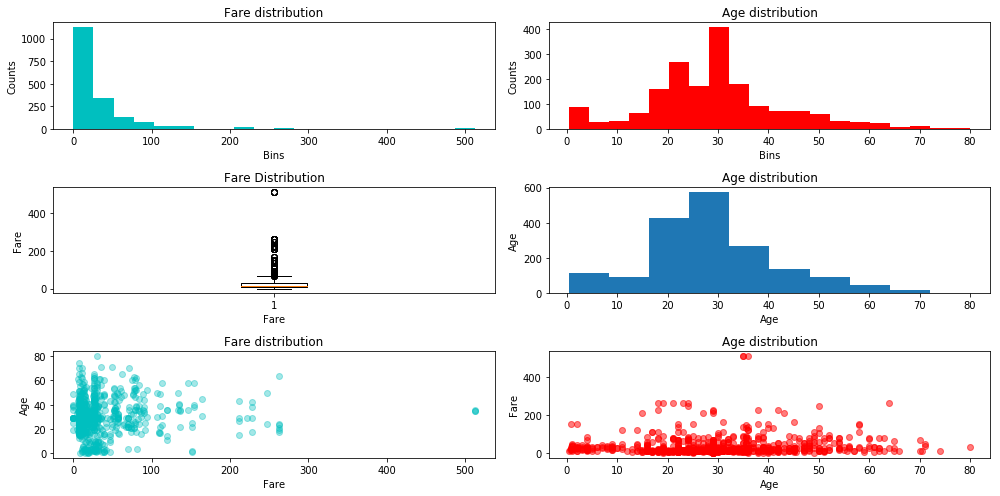

In [585]:
f,ax_arr=plt.subplots(3,2,figsize=(14,7))


ax_arr[0,0].hist(df['Fare'],bins=20,color='c')
ax_arr[0,0].set_title('Fare distribution')
ax_arr[0,0].set_xlabel('Bins')
ax_arr[0,0].set_ylabel('Counts')

ax_arr[0,1].hist(df['Age'],bins=20,color='r')
ax_arr[0,1].set_title('Age distribution')
ax_arr[0,1].set_xlabel('Bins')
ax_arr[0,1].set_ylabel('Counts')

ax_arr[1,0].boxplot(df['Fare'].values)
ax_arr[1,0].set_title('Fare Distribution')
ax_arr[1,0].set_xlabel('Fare')
ax_arr[1,0].set_ylabel('Fare')

ax_arr[1,1].hist(df['Age'].values)
ax_arr[1,1].set_title('Age distribution')
ax_arr[1,1].set_xlabel('Age')
ax_arr[1,1].set_ylabel('Age')


ax_arr[2,0].scatter(df['Fare'],df['Age'],alpha=0.2,color='c')
ax_arr[2,0].set_title('Fare distribution')
ax_arr[2,0].set_xlabel('Fare')
ax_arr[2,0].set_ylabel('Age')

ax_arr[2,1].scatter(df['Age'],df['Fare'],alpha=0.3,color='r')
ax_arr[2,1].set_title('Age distribution')
ax_arr[2,1].set_xlabel('Age')
ax_arr[2,1].set_ylabel('Fare')
    
plt.tight_layout()
plt.show()

## Distributions-Bivariate

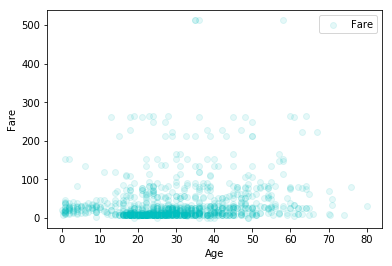

In [460]:
plt.scatter(x=df['Age'],y=df['Fare'],marker='o',color='c',alpha=0.1)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(loc='upper right')

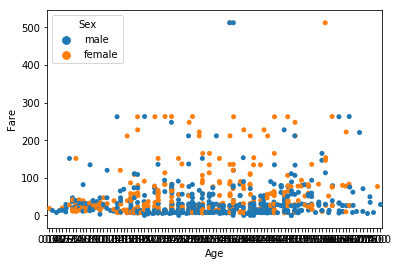

In [461]:
sns.stripplot(x=df['Age'],y=df['Fare'],data=df,hue='Sex',jitter=True)

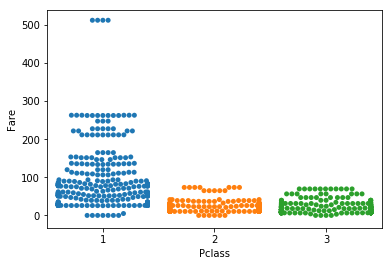

In [462]:
sns.swarmplot(x=df['Pclass'],y=df['Fare'],data=df)

#### This implies that First class Passengers have higher Fare as usual but there are passengers who have paid less fare in first class ,may be they have booked it earlier or they might have got some discount,for 2 and 3 class the fare ranges from 0 to 100

## Grouping and Aggregations

In [463]:
df.groupby('Sex')['Age'].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [464]:
df.groupby('Pclass')['Fare','Age'].mean()

,Fare,Age
Pclass,,
1,87.508992,39.159930
2,21.179196,29.506705
3,13.302889,24.816367


In [465]:
df.groupby('Pclass').agg({'Fare':'mean','Age':'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [466]:
df.groupby('Pclass').agg({'Fare':{'mean_fare':'mean','medain_fare':'median','max_fare':'max','min_fare':'min'},
                          'Age':{'mean_age':'mean','median_age':'median','max_age':'max','min_age':'min'}})

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                       Age             \
        mean_fare medain_fare  max_fare min_fare   mean_age median_age   
Pclass                                                                   
1       87.508992     60.0000  512.3292      0.0  39.159930       39.0   
2       21.179196     15.0458   73.5000      0.0  29.506705       29.0   
3       13.302889      8.0500   69.5500      0.0  24.816367       24.0   

                        
       max_age min_age  
Pclass                  
1         80.0    0.92  
2         70.0    0.67  
3         74.0    0.17

In [467]:
df.groupby(['Pclass','Embarked'])['Fare'].mean()

Pclass  Embarked
1       C           106.845330
        Q            90.000000
        S            72.148094
2       C            23.300593
        Q            11.735114
        S            21.206921
3       C            11.021624
        Q            10.390820
        S            14.435422
Name: Fare, dtype: float64

In [468]:
df.groupby(['Pclass','Embarked'])['Fare'].mean().unstack()

Embarked,C,Q,S
Pclass,,,
1,106.845330,90.000000,72.148094
2,23.300593,11.735114,21.206921
3,11.021624,10.390820,14.435422


In [469]:
df.groupby(['Pclass','Embarked'])['Fare'].agg(['max','min'])

max      min
Pclass Embarked                   
1      C         512.3292  25.7417
       Q          90.0000  90.0000
       S         263.0000   0.0000
2      C          41.5792  12.0000
       Q          12.3500   9.6875
       S          73.5000   0.0000
3      C          22.3583   4.0125
       Q          29.1250   6.7500
       S          69.5500   0.0000

## Crosstabs

In [470]:
pd.crosstab(df['Sex'],df['Pclass'])

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


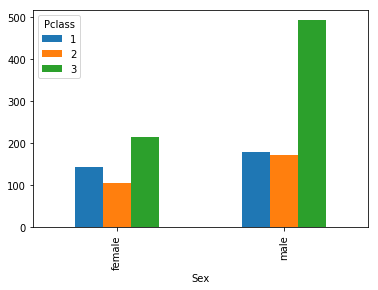

In [471]:
pd.crosstab(df['Sex'],df['Pclass']).plot(kind='bar')



## Pivot Tables

In [472]:
pd.pivot_table(index='Sex',columns='Pclass',values='Age',aggfunc='mean',data=df)

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


## Data munging

##### 1.Treating Missing Values

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [474]:
total_missing=df.isnull().sum()
percent_missing=(total_missing/len(df))*100
percent_missing

Age         20.091673
Cabin       77.463713
Embarked     0.152788
Fare         0.076394
Name         0.000000
Parch        0.000000
Pclass       0.000000
Sex          0.000000
SibSp        0.000000
Survived     0.000000
Ticket       0.000000
dtype: float64

In [475]:
df[df['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [476]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [477]:
pd.crosstab(df['Survived'][df['Survived']!=-888],df['Embarked'][df['Survived']!=-888])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [478]:
df.groupby(['Pclass','Embarked'])['Fare'].median().unstack()

Embarked,C,Q,S
Pclass,,,
1,76.7292,90.00,52.000
2,15.3146,12.35,15.375
3,7.8958,7.75,8.050


#### This implies that the 2 passengers who have embarkment data missing have 'Fare' equal to 80 so after checking the different embarkment points we came to know that these 2 customers might  have boarded from embarkment 'C' as the median price for this embarkment is close to 80,so lets impute the missing embarkment with 'C 

In [479]:
df['Embarked'].fillna('C',inplace=True)

In [480]:
df[df['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701


In [481]:
missing_median_fare=df.loc[(df['Pclass']==3) & (df['Embarked']=='S')]['Fare'].median()


In [482]:
df['Fare'].fillna(missing_median_fare,inplace=True)

In [483]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [484]:
pd.options.display.max_rows=15

In [485]:
df[df['Age'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959
30,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,3,male,0,0,349216
32,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,1,female,1,1,PC 17569
...,...,...,...,...,...,...,...,...,...,...,...
1274,NaN,NaN,S,14.5000,"Risien, Mrs. Samuel (Emma)",0,3,female,0,-888,364498


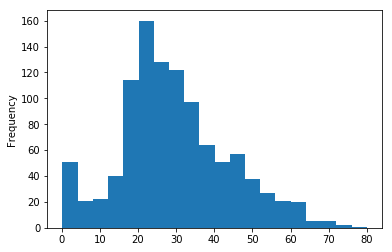

In [486]:
df['Age'].plot(kind='hist',bins=20)

In [487]:
df['Age'].median()

28.0

In [488]:
df.groupby('Sex')['Age'].median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

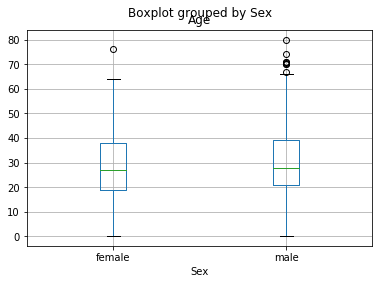

In [489]:
df[df['Age'].notnull()].boxplot('Age','Sex')

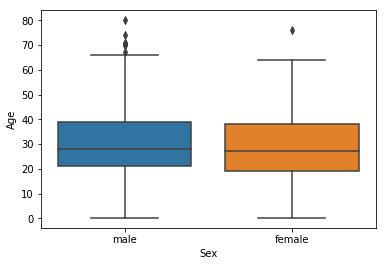

In [490]:
sns.boxplot(x=df['Sex'],y=df['Age'])
#sns.set(style="darkgrid", palette="deep")

In [491]:
df.groupby(['Pclass','Sex'])['Age'].mean()

Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64

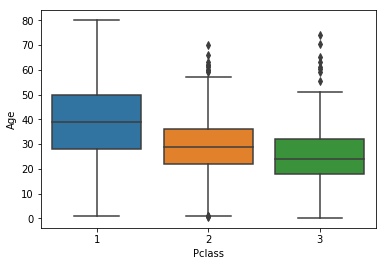

In [492]:
sns.boxplot(df["Pclass"],df['Age'])

In [493]:
df['Name']

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
                              ...                        
1303      Minahan, Mrs. William Edward (Lillian E Thorpe)
1304                       Henriksson, Miss. Jenny Lovisa
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [494]:
def get_title(name):
    first_name_title=name.split(',')[1]
    title=first_name_title.split('.')[0]
    title=title.strip().lower()
    return title

In [495]:
df['Name'].map(lambda x: get_title(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [496]:
df['Title']=df['Name'].map(lambda x: get_title(x))

In [497]:
df['Title'].unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [498]:
df.groupby('Title')['Age'].median()

Title
capt            70.0
col             54.5
don             40.0
dona            39.0
dr              49.0
jonkheer        38.0
lady            48.0
                ... 
mme             24.0
mr              29.0
mrs             35.5
ms              28.0
rev             41.5
sir             49.0
the countess    33.0
Name: Age, Length: 18, dtype: float64

In [499]:
age_median=df.groupby('Title')['Age'].transform('median')
df['Age'].fillna(age_median,inplace=True)

In [500]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 172.9+ KB


##### 2.Treating Outliers

(array([ 59.,  21.,  22.,  40., 114., 210., 129., 298., 124.,  64.,  51.,
         57.,  39.,  27.,  21.,  20.,   5.,   5.,   2.,   1.]),
 array([ 0.17  ,  4.1615,  8.153 , 12.1445, 16.136 , 20.1275, 24.119 ,
        28.1105, 32.102 , 36.0935, 40.085 , 44.0765, 48.068 , 52.0595,
        56.051 , 60.0425, 64.034 , 68.0255, 72.017 , 76.0085, 80.    ]),
 <a list of 20 Patch objects>)

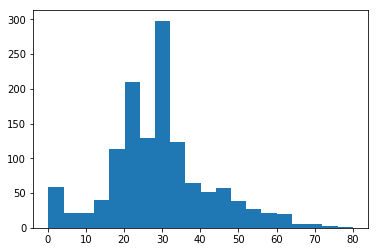

In [501]:
plt.hist(df['Age'],bins=20)

In [502]:
df.loc[df['Age']>70]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0,PC 17754,mr
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0,370369,mr
494,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,1,male,0,0,PC 17609,mr
631,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1,27042,mr
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0,347060,mr
988,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,1,female,1,-888,19877,mrs


(array([828., 243., 102.,  52.,  17.,  25.,   4.,   0.,  18.,   3.,  13.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <a list of 20 Patch objects>)

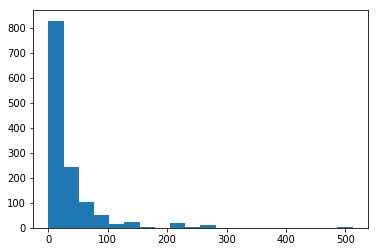

In [503]:
plt.hist(df['Fare'],bins=20)

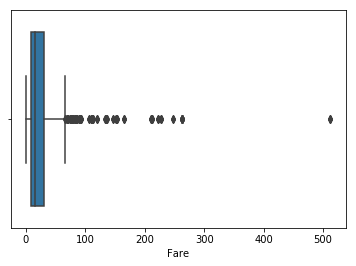

In [504]:
sns.boxplot(df['Fare'])

In [505]:
df.loc[df['Fare']==df['Fare'].max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-888,PC 17755,mrs


##### This implies that these 4 people either belong to the same family or were together in the ship

In [506]:
LogFare=np.log(df['Fare']+1.0)

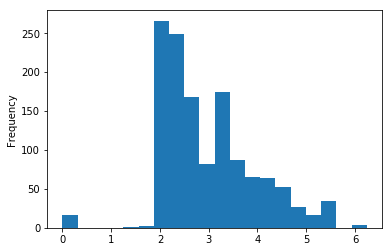

In [507]:
LogFare.plot(kind='hist',bins=20)

In [508]:
pd.qcut(df['Fare'],4)

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
6         (7.896, 14.454]
7       (31.275, 512.329]
              ...        
1303    (31.275, 512.329]
1304      (-0.001, 7.896]
1305      (7.896, 14.454]
1306    (31.275, 512.329]
1307      (-0.001, 7.896]
1308      (7.896, 14.454]
1309     (14.454, 31.275]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [509]:
pd.qcut(df['Fare'],4,labels=['very_low','low','high','very_high'])

PassengerId
1        very_low
2       very_high
3             low
4       very_high
5             low
6             low
7       very_high
          ...    
1303    very_high
1304     very_low
1305          low
1306    very_high
1307     very_low
1308          low
1309         high
Name: Fare, Length: 1309, dtype: category
Categories (4, object): [very_low < low < high < very_high]

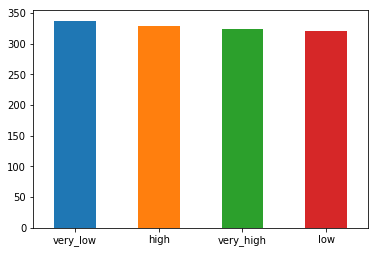

In [510]:
pd.qcut(df['Fare'],4,labels=['very_low','low','high','very_high']).value_counts().plot(kind='bar',rot=0)

In [511]:
df['FareBin']=pd.qcut(df['Fare'],4,labels=['very_low','low','high','very_high'])

In [512]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,FareBin
PassengerId,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,mr,very_low
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,mrs,very_high
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,miss,low
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,mrs,very_high
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,mr,low


In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 13 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
FareBin     1309 non-null category
dtypes: category(1), float64(2), int64(4), object(6)
memory usage: 174.4+ KB


## Feature Engineering

In [514]:
df['AgeState']=np.where(df['Age']>=18,'Adult','child')

In [515]:
df['AgeState'].value_counts()

Adult    1147
child     162
Name: AgeState, dtype: int64

In [516]:
pd.crosstab(df['Survived'][df['Survived']!=-888],df['AgeState'][df['Survived']!=-888])

AgeState,Adult,child
Survived,,
0,495,54
1,279,63


#### This implie that childrens were given more importance 

In [517]:
df['FamilySize']=df['Parch']+df['SibSp']+1

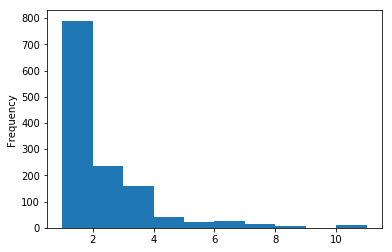

In [518]:
df['FamilySize'].plot(kind='hist')

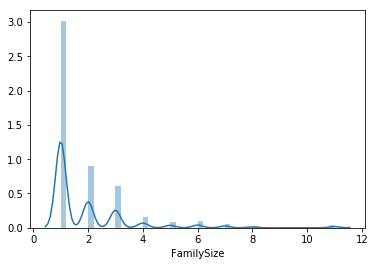

In [519]:
sns.distplot(df['FamilySize'])

In [520]:
df.loc[df['FamilySize']==df['FamilySize'].max(),['Name','Ticket','Survived','familySize']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Name,Ticket,Survived,familySize
PassengerId,,,,
160,"Sage, Master. Thomas Henry",CA. 2343,0,NaN
181,"Sage, Miss. Constance Gladys",CA. 2343,0,NaN
202,"Sage, Mr. Frederick",CA. 2343,0,NaN
325,"Sage, Mr. George John Jr",CA. 2343,0,NaN
793,"Sage, Miss. Stella Anna",CA. 2343,0,NaN
847,"Sage, Mr. Douglas Bullen",CA. 2343,0,NaN
864,"Sage, Miss. Dorothy Edith ""Dolly""",CA. 2343,0,NaN
1080,"Sage, Miss. Ada",CA. 2343,-888,NaN
1234,"Sage, Mr. John George",CA. 2343,-888,NaN


#### Since the 7 memebers die,the remining 4 members may also have not survived

In [521]:
pd.crosstab(df['Survived'][df['Survived']!=-888],df['FamilySize'][df['Survived']!=-888])

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


In [522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 15 columns):
Age           1309 non-null float64
Cabin         295 non-null object
Embarked      1309 non-null object
Fare          1309 non-null float64
Name          1309 non-null object
Parch         1309 non-null int64
Pclass        1309 non-null int64
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      1309 non-null int64
Ticket        1309 non-null object
Title         1309 non-null object
FareBin       1309 non-null category
AgeState      1309 non-null object
FamilySize    1309 non-null int64
dtypes: category(1), float64(2), int64(5), object(7)
memory usage: 194.9+ KB


#### This implies  more members with small family size survived as compared to large family size

In [523]:
df['IsMother']=np.where(((df['Sex']=='female') & (df['Parch']>0) & (df['Age']>18) & (df['Title']!='Miss')),1,0)

In [524]:
pd.crosstab(df['Survived'][df['Survived']!=-888],df['IsMother'][df['Survived']!=-888])

IsMother,0,1
Survived,,
0,524,25
1,291,51


#### Motherhood has some impact on survival

In [533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
Age           1308 non-null float64
Cabin         294 non-null object
Embarked      1308 non-null object
Fare          1308 non-null float64
Name          1308 non-null object
Parch         1308 non-null float64
Pclass        1308 non-null float64
Sex           1308 non-null object
SibSp         1308 non-null float64
Survived      1308 non-null float64
Ticket        1308 non-null object
Title         1308 non-null object
FareBin       1308 non-null category
AgeState      1308 non-null object
FamilySize    1308 non-null float64
IsMother      1308 non-null float64
Deck          1309 non-null object
dtypes: category(1), float64(8), object(8)
memory usage: 215.3+ KB


In [526]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [527]:
df.loc[df['Cabin']=='T']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,FareBin,AgeState,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,,
340,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,1,male,0,0,113784,mr,very_high,Adult,1,0


In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 16 columns):
Age           1309 non-null float64
Cabin         295 non-null object
Embarked      1309 non-null object
Fare          1309 non-null float64
Name          1309 non-null object
Parch         1309 non-null int64
Pclass        1309 non-null int64
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      1309 non-null int64
Ticket        1309 non-null object
Title         1309 non-null object
FareBin       1309 non-null category
AgeState      1309 non-null object
FamilySize    1309 non-null int64
IsMother      1309 non-null int32
dtypes: category(1), float64(2), int32(1), int64(5), object(7)
memory usage: 200.0+ KB


In [529]:
df.loc[df['Cabin']=='T']=np.NaN

In [530]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [535]:
def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')
df['Deck']=df['Cabin'].map(lambda x: get_deck(x))

In [536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
Age           1308 non-null float64
Cabin         294 non-null object
Embarked      1308 non-null object
Fare          1308 non-null float64
Name          1308 non-null object
Parch         1308 non-null float64
Pclass        1308 non-null float64
Sex           1308 non-null object
SibSp         1308 non-null float64
Survived      1308 non-null float64
Ticket        1308 non-null object
Title         1308 non-null object
FareBin       1308 non-null category
AgeState      1308 non-null object
FamilySize    1308 non-null float64
IsMother      1308 non-null float64
Deck          1309 non-null object
dtypes: category(1), float64(8), object(8)
memory usage: 215.3+ KB


In [537]:
df['Deck'].value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [538]:
pd.crosstab(df['Survived'][df['Survived']!=-888],df['Deck'])

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0.0,8,12,24,8,8,5,2,481
1.0,7,35,35,25,24,8,2,206


In [539]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
Age           1308 non-null float64
Cabin         294 non-null object
Embarked      1308 non-null object
Fare          1308 non-null float64
Name          1308 non-null object
Parch         1308 non-null float64
Pclass        1308 non-null float64
Sex           1308 non-null object
SibSp         1308 non-null float64
Survived      1308 non-null float64
Ticket        1308 non-null object
Title         1308 non-null object
FareBin       1308 non-null category
AgeState      1308 non-null object
FamilySize    1308 non-null float64
IsMother      1308 non-null float64
Deck          1309 non-null object
dtypes: category(1), float64(8), object(8)
memory usage: 215.3+ KB


### Feature Encoding 

In [540]:
df['IsMale']=np.where(df['Sex']=='male',1,0)

In [541]:
df=pd.get_dummies(df,columns=['Deck','Pclass','Title','FareBin','Embarked','AgeState'])

In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 50 columns):
Age                   1308 non-null float64
Cabin                 294 non-null object
Fare                  1308 non-null float64
Name                  1308 non-null object
Parch                 1308 non-null float64
Sex                   1308 non-null object
SibSp                 1308 non-null float64
Survived              1308 non-null float64
Ticket                1308 non-null object
FamilySize            1308 non-null float64
IsMother              1308 non-null float64
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1.0            1309 non-null 

In [543]:
df.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'],axis=1,inplace=True)

In [544]:
columns=[column for column in df.columns  if column!='Survived']
columns=['Survived']+columns
df=df[columns]

In [545]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 44 columns):
Survived              1308 non-null float64
Age                   1308 non-null float64
Fare                  1308 non-null float64
FamilySize            1308 non-null float64
IsMother              1308 non-null float64
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1.0            1309 non-null uint8
Pclass_2.0            1309 non-null uint8
Pclass_3.0            1309 non-null uint8
Title_capt            1309 non-null uint8
Title_col             1309 non-null uint8
Title_don             1309 non-null uint8
Title_dona            1309 non-null uint8
T

### Saving the processed data

In [552]:
processed_data_path=os.path.join(os.path.pardir,'data','processed')
write_train_path=os.path.join(processed_data_path,'train.csv')
write_test_path=os.path.join(processed_data_path,'test.csv')

In [553]:
df.loc[df['Survived']!=-888].to_csv(write_train_path)
columns=[column for column in df.columns if column!='Survived']
df.loc[df['Survived']==-888,columns].to_csv(write_test_path)

### Creating Script

In [556]:
get_processed_data_script=os.path.join(os.path.pardir,'src','data','get_processed_data.py')

In [561]:
%%writefile $get_processed_data_script
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def read_data():
    raw_data_path=os.path.join(os.path.pardir,'data','raw')
    train_data_path=os.path.join(raw_data_path,'train.csv')
    test_data_path=os.path.join(raw_data_path,'test.csv')
    train_df=pd.read_csv(train_data_path,index_col='PassengerId')
    test_df=pd.read_csv(test_data_path,index_col='PassengerId')
    test_df['Survived']=-888
    df=pd.concat((train_df,test_df),axis=0)
    return df


def process_data(df):
    #chaining method
    return (df
            .assign(Title=df['Name'].map(lambda x: get_title(x)))
            .pipe(fill_missing_values)
            .assign(FareBin=lambda x :pd.qcut(x['Fare'],4,labels=['very_low','low','high','very_high']))
            .assign(AgeState=lambda x :np.where(x['Age']>=18,'Adult','child'))
            .assign(FamliySize=lambda x :x['Parch']+x['SibSp']+1)
            .assign(IsMother=lambda x:np.where(((x['Sex']=='female') & (x['Parch']>0) & (x['Age']>18) & (x['Title']!='Miss')),1,0) )
            .assign(Cabin=lambda x:np.where(x['Cabin']=='T',np.NaN,x['Cabin']) )
            .assign(Deck=lambda x:x['Cabin'].map(lambda x: get_deck(x)) )
            .assign(IsMale=lambda x :np.where(x['Sex']=='male',1,0))
            .pipe(pd.get_dummies,columns=['Deck','Pclass','Title','FareBin','Embarked','AgeState'])
            .drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'],axis=1)
            .pipe(reorder_columns)
           )
            
def get_title(name):
    first_name_title=name.split(',')[1]
    title=first_name_title.split('.')[0]
    title=title.strip().lower()
    return title
            
def fill_missing_values(df):
    df['Embarked'].fillna('C',inplace=True)
    missing_median_fare=df.loc[(df['Pclass']==3) & (df['Embarked']=='S')]['Fare'].median()
    df['Fare'].fillna(missing_median_fare,inplace=True)
    age_median=df.groupby('Title')['Age'].transform('median')
    df['Age'].fillna(age_median,inplace=True)
    return df        
            
def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')

def reorder_columns(df):
    columns=[column for column in df.columns  if column!='Survived']
    columns=['Survived']+columns
    df=df[columns]
    return df

def write_data(df):
    processed_data_path=os.path.join(os.path.pardir,'data','processed')
    write_train_path=os.path.join(processed_data_path,'train.csv')
    write_test_path=os.path.join(processed_data_path,'test.csv')
    df.loc[df['Survived']!=-888].to_csv(write_train_path)
    columns=[column for column in df.columns if column!='Survived']
    df.loc[df['Survived']==-888,columns].to_csv(write_test_path)
    
if __name__=='__main__':
    df=read_data()
    df=process_data(df)
    write_data(df)
    
            
    

Overwriting ..\src\data\get_processed_data.py


In [562]:
!python $get_processed_data_script

In [563]:
train_df=pd.read_csv(write_train_path)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 45 columns):
PassengerId           891 non-null int64
Survived              891 non-null int64
Age                   891 non-null float64
Fare                  891 non-null float64
FamliySize            891 non-null int64
IsMother              891 non-null int64
IsMale                891 non-null int64
Deck_A                891 non-null int64
Deck_B                891 non-null int64
Deck_C                891 non-null int64
Deck_D                891 non-null int64
Deck_E                891 non-null int64
Deck_F                891 non-null int64
Deck_G                891 non-null int64
Deck_Z                891 non-null int64
Pclass_1              891 non-null int64
Pclass_2              891 non-null int64
Pclass_3              891 non-null int64
Title_capt            891 non-null int64
Title_col             891 non-null int64
Title_don             891 non-null int64
Title_dona            891 non-

In [564]:
test_df=pd.read_csv(write_train_path)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 45 columns):
PassengerId           891 non-null int64
Survived              891 non-null int64
Age                   891 non-null float64
Fare                  891 non-null float64
FamliySize            891 non-null int64
IsMother              891 non-null int64
IsMale                891 non-null int64
Deck_A                891 non-null int64
Deck_B                891 non-null int64
Deck_C                891 non-null int64
Deck_D                891 non-null int64
Deck_E                891 non-null int64
Deck_F                891 non-null int64
Deck_G                891 non-null int64
Deck_Z                891 non-null int64
Pclass_1              891 non-null int64
Pclass_2              891 non-null int64
Pclass_3              891 non-null int64
Title_capt            891 non-null int64
Title_col             891 non-null int64
Title_don             891 non-null int64
Title_dona            891 non-